In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("medical_examination.csv", index_col="id")

In [3]:
replace_values = {"cholesterol":{1:0, 2:1, 3:1}, "gluc":{1:0, 2:1, 3:1}}
df.replace(replace_values, inplace=True)

In [16]:
features = ["active", "alco", "cholesterol", "gluc", "smoke", "cardio", "overweight"]

In [5]:
df[features]

,active,alco,cholesterol,gluc,smoke,cardio
id,,,,,,
0,1,0,0,0,0,0
1,1,0,1,0,0,1
2,0,0,1,0,0,1
3,1,0,0,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
99993,1,0,0,0,1,0
99995,1,0,1,1,0,1
99996,0,1,1,0,0,1


In [7]:
df[features].melt(id_vars="cardio")

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
349995,0,smoke,1
349996,1,smoke,0
349997,1,smoke,0
349998,1,smoke,0


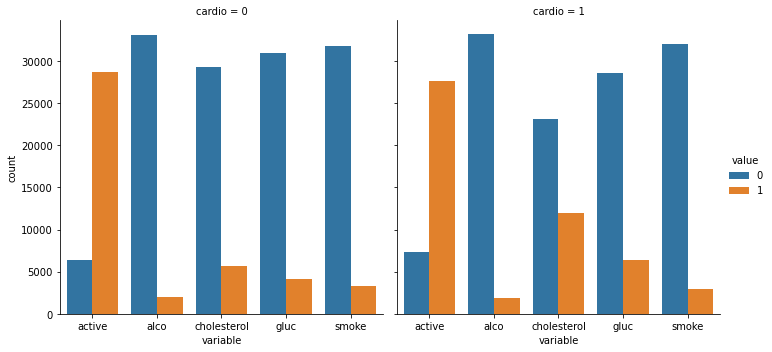

In [22]:
sns.catplot(data=df[features].melt(id_vars="cardio"), kind="count", x="variable", hue="value", col="cardio")

In [21]:
df_c1.replace(replace_values)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
1,20228,1,156,85.0,140,90,1,0,0,0,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1
3,17623,2,169,82.0,150,100,0,0,0,0,1,1
12,22584,2,178,95.0,130,90,1,1,0,0,1,1
24,16782,2,172,112.0,120,80,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,19699,1,172,70.0,130,90,0,0,0,0,1,1
99992,21074,1,165,80.0,150,80,0,0,0,0,1,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1


In [18]:
df["BMI"] = df["weight"] / ((df["height"] / 100) ** 2)

In [19]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579


In [23]:
df["overweight"] = (df["BMI"] > 25).astype(int)

In [24]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1


In [8]:
sns.catplot?

In [5]:
df_heat = df[df['ap_lo'] <= df['ap_hi']]
df_heat = df_heat[df_heat['height'] >= df_heat['height'].quantile(0.025)]
df_heat = df_heat[df_heat['height'] <= df_heat['height'].quantile(0.975)]
df_heat = df_heat[df_heat['weight'] >= df_heat['weight'].quantile(0.025)]
df_heat = df_heat[df_heat['weight'] <= df_heat['weight'].quantile(0.975)]

In [6]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1
3,17623,2,169,82.0,150,100,0,0,0,0,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1


In [7]:
df_heat

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1
3,17623,2,169,82.0,150,100,0,0,0,0,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,19699,1,172,70.0,130,90,0,0,0,0,1,1
99992,21074,1,165,80.0,150,80,0,0,0,0,1,1
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0


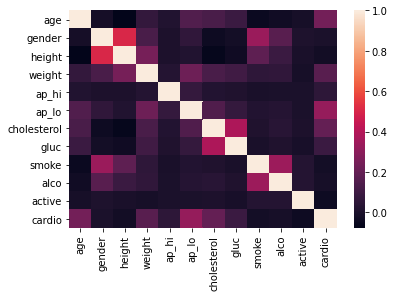

In [10]:
sns.heatmap(df_heat.corr())

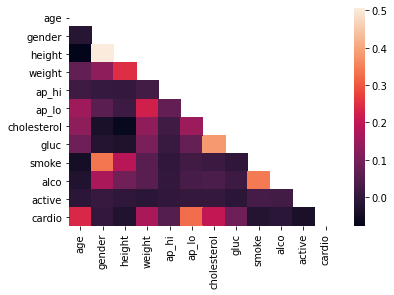

In [12]:

mask = np.triu(np.ones_like(df_heat.corr(), dtype=bool))
sns.heatmap(df_heat.corr(), mask=mask)

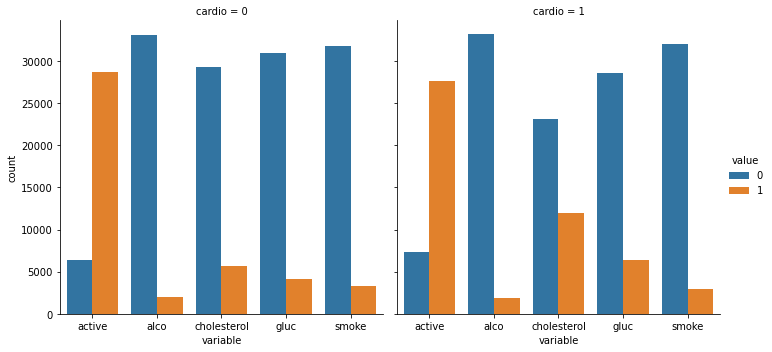

In [15]:
df_cat = df[features]
df_cat = df_cat.melt(id_vars="cardio")
sns.catplot(data=df_cat, kind="count", x="variable", hue="value", col="cardio")

In [14]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
349995,0,smoke,1
349996,1,smoke,0
349997,1,smoke,0
349998,1,smoke,0


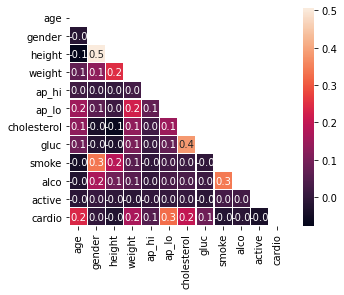

In [23]:
sns.heatmap(df_heat.corr(),
            mask=mask,
            square=True,
            annot=True,
            fmt='.1f',
            linewidths=.2)